# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [23]:
# Libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Challenge 1

#### The data we will use in this challenge is:

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

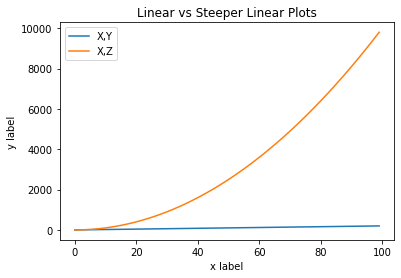

In [4]:
# Method 1
plt.plot(x, y, label='X,Y') #Plots x against y
plt.plot(x, z, label='X,Z')  #Plots x against z

plt.xlabel('x label') #Gives label to X axis
plt.ylabel('y label') #Gives label to Y axis

plt.title("Linear vs Steeper Linear Plots") #Gives plot a title
plt.legend() #Gives legend to plot
plt.show()


#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

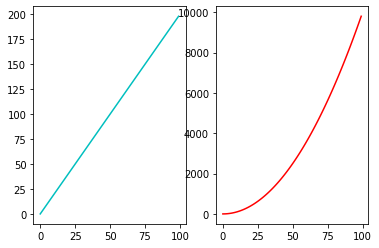

In [5]:
# Method 2
fig, ax = plt.subplots(1, 2) #assigns both figure and axes fro subplot (nrows, ncols)

ax[0].plot(x, y, "c-", label='X,Y') #Plot of X against Y at position 0 of figure color cyan
ax[1].plot(x, z, "r-", label='X,Z') #Plot of X against Z at position 1 of figure color red

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

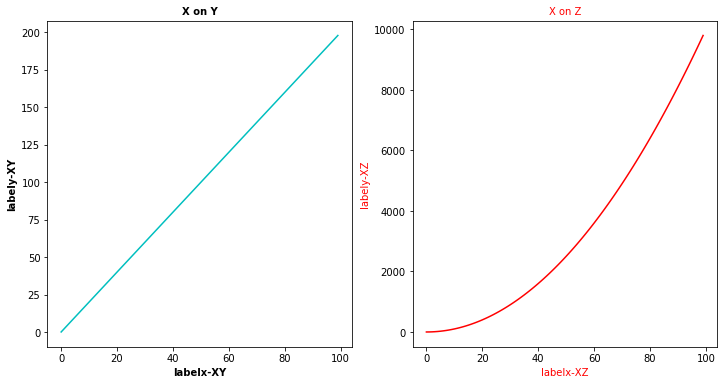

In [6]:
# your code here

fig, ax = plt.subplots(1, 2, figsize=(12,6)) #set (width(x) and height) for entire figure 

ax[0].plot(x, y, "c-") #Plot of X against Y at position 0 of figure color cyan
ax[1].plot(x, z, "r-") #Plot of X against Z at position 1 of figure  color red
ax[0].set_title('X on Y',fontweight='heavy', size=10)
ax[1].set_title('X on Z', color="red",fontweight='light', size=10)
ax[0].set_xlabel('labelx-XY',fontweight="heavy") #Sets label for X axis of plot on axis 0 of figure
ax[0].set_ylabel('labely-XY',fontweight="heavy")
ax[1].set_xlabel('labelx-XZ',color="red") #Sets label for X axis of plot on axis 1 of figure
ax[1].set_ylabel('labely-XZ',color="red")

plt.show()


#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

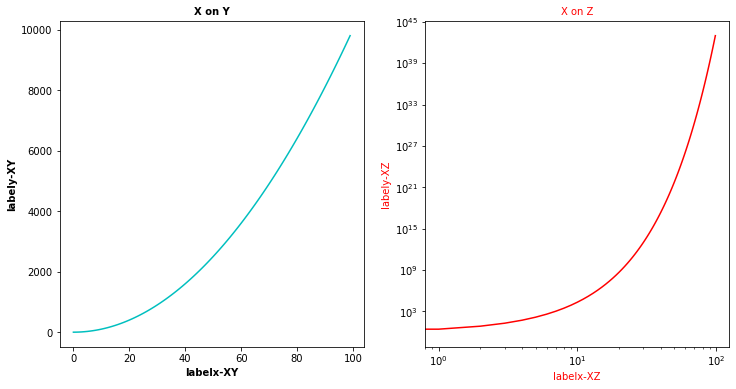

In [7]:
# your code here

fig, ax = plt.subplots(1, 2, figsize=(12,6)) #set (width(x) and height) for entire figure 

ax[0].plot(x, x**2, "c-", label='Quadratic') #Plot of X**2 at position 0 of figure color cyan
ax[1].plot(x, np.e**x, "r-", label='Exponential') #Plot of e^X at position 1 of figure color red
ax[0].set_title('X on Y',fontweight='heavy', size=10)
ax[1].set_title('X on Z', color="red",fontweight='light', size=10)
ax[0].set_xlabel('labelx-XY',fontweight="heavy") #Sets label for X axis of plot on axis 0 of figure
ax[0].set_ylabel('labely-XY',fontweight="heavy")
ax[1].set_xlabel('labelx-XZ',color="red") #Sets label for X axis of plot on axis 1 of figure
ax[1].set_ylabel('labely-XZ',color="red")

ax[0].set_xscale("linear") #Sets scale for X axis of plot on axis 0 of figure
ax[0].set_yscale("linear")
ax[1].set_xscale("log") #Sets scale for X axis of plot on axis 1 of figure
ax[1].set_yscale("log")

plt.show()

#### As a bonus challenge, try to add a legend to the plot.

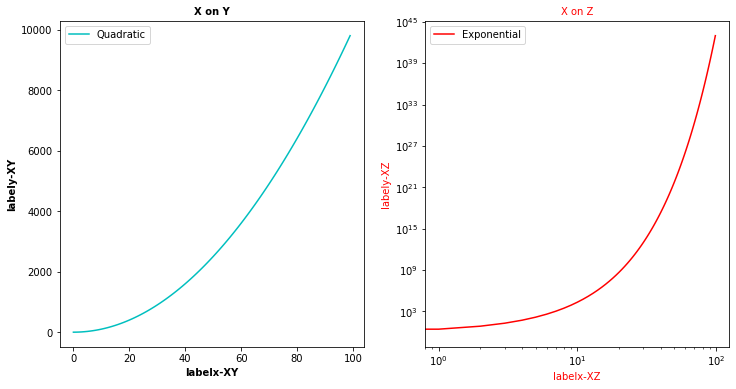

In [8]:
# your code here

fig, ax = plt.subplots(1, 2, figsize=(12,6)) #set (width(x) and height) for entire figure 

ax[0].plot(x, x**2, "c-", label='Quadratic') #Plot of X**2 at position 0 of figure color cyan
ax[1].plot(x, np.e**x, "r-", label='Exponential') #Plot of e^X at position 1 of figure color red
ax[0].set_title('X on Y',fontweight='heavy', size=10)
ax[1].set_title('X on Z', color="red",fontweight='light', size=10)
ax[0].set_xlabel('labelx-XY',fontweight="heavy") #Sets label for X axis of plot on axis 0 of figure
ax[0].set_ylabel('labely-XY',fontweight="heavy")
ax[1].set_xlabel('labelx-XZ',color="red") #Sets label for X axis of plot on axis 1 of figure
ax[1].set_ylabel('labely-XZ',color="red")

ax[0].set_xscale("linear") #Sets scale for X axis of plot on axis 0 of figure
ax[0].set_yscale("linear")
ax[1].set_xscale("log") #Sets scale for X axis of plot on axis 1 of figure
ax[1].set_yscale("log")

ax[0].legend()
ax[1].legend()

plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [9]:
# your code here
fitbit = pd.read_csv("Fitbit2.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

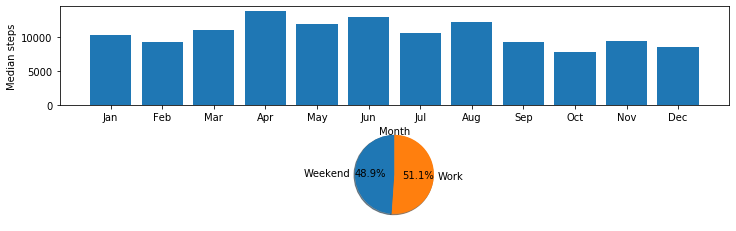

<Figure size 432x288 with 0 Axes>

In [10]:
# MEDIAN STEPS BY MONTH_ENCODED
steps_month = fitbit.groupby(["Months_encoded"], as_index=False).agg({"Steps":"median"})
# MEDIAN STEPS BY WORK_OR_WEEKEND
steps_work_we = fitbit.groupby(["Work_or_Weekend"], as_index=False).agg({"Steps":"median"})

months= ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

fig, ax = plt.subplots(2,1, figsize=(12,4))

plt.sca(ax[0])# object oriented interface setting active subplot on axis 0 of figure
scalar= [i for i in steps_month["Months_encoded"]]
height= [i for i in steps_month["Steps"]]
plt.bar(x=scalar,height=height)
plt.xticks(range(1,13), months) # Months labels to the x axis 
plt.ylabel('Median steps') # label to y axis
plt.xlabel('Month') # label to x axis

plt.sca(ax[1])# object oriented interface setting active subplot on axis 1 of figure
sizes = [i for i in steps_work_we["Steps"]]
labels= ["Weekend","Work"]
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

plt.savefig('figures.png')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

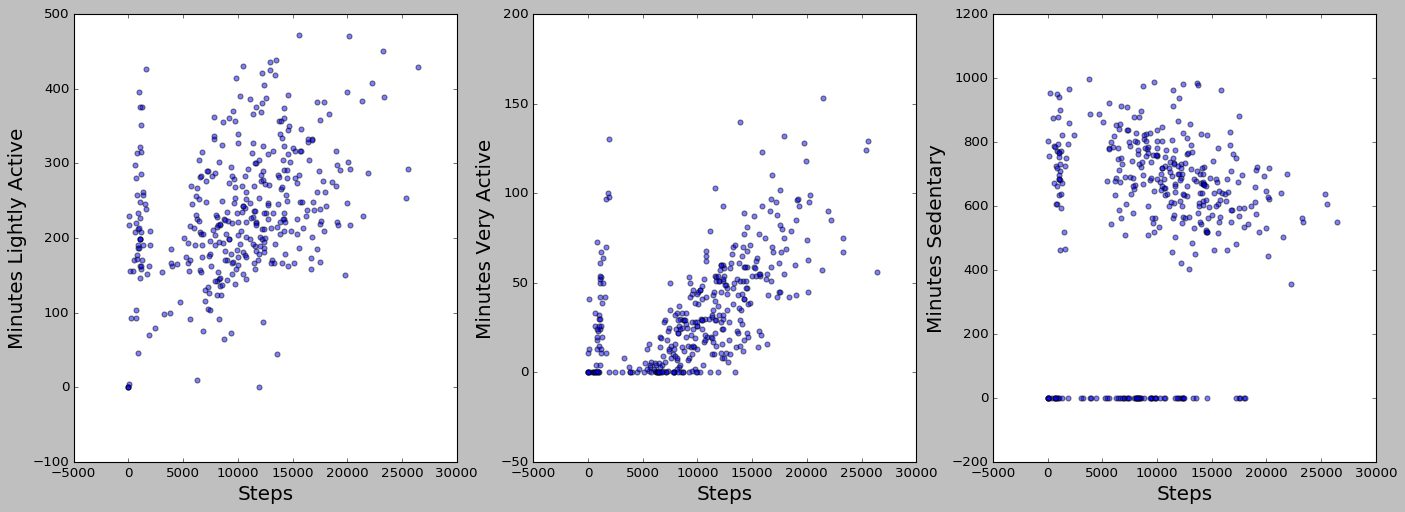

In [99]:
# your code here
activity_level = ["Minutes Lightly Active","Minutes Very Active","Minutes Sedentary"]
axis_index = [i for i in range(3)]

fig, ax = plt.subplots(1,3, figsize=(21,7))

for level,i in zip(activity_level, axis_index):
    plt.sca(ax[i])
    plt.scatter(x="Steps", y=level, data = fitbit, alpha=0.5)
    plt.ylabel(level, fontsize=18) # label to y axis
    plt.xlabel('Steps',fontsize=18)
    

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [17]:
# your code here
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [16]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [20]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include=["int","float"])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [21]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include=["object"])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [26]:
# your code here
import matplotlib.style
import matplotlib as mpl
mpl.style.use("classic")

#### Use the right visulalization to show the distribution of column `Age`.

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

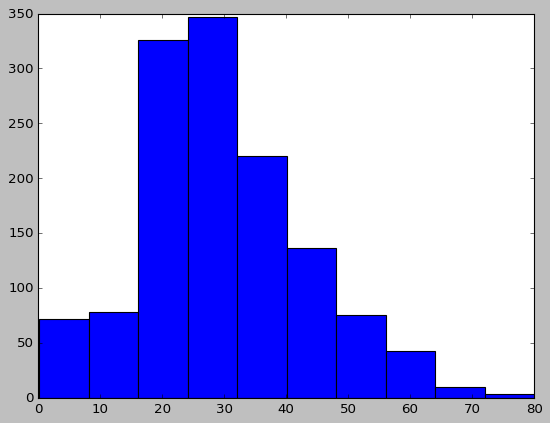

In [29]:
# your code here
plt.hist(titanic["Age"])

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

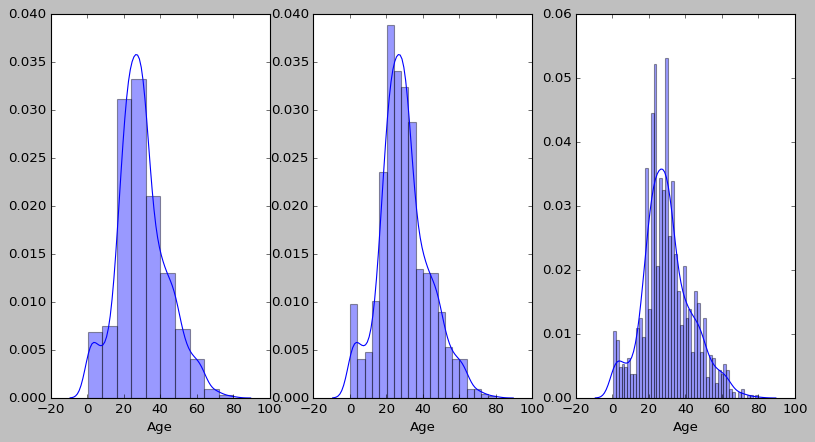

In [31]:
# your code here
fig, ax = plt.subplots(1,3, figsize=(12,6))

plt.sca(ax[0])
sns.distplot(titanic['Age'], bins=10)
plt.sca(ax[1])
sns.distplot(titanic['Age'], bins=20)
plt.sca(ax[2])
sns.distplot(titanic['Age'], bins=50)

#### How does the bin size affect your plot?

In [ ]:
"""
Increasing the number of bins, the frequecy of each observation becomes less omogeneous.
Thus piercing more often through the curve approximating the bell-shaped distribution for the
observations.
"""

#### Use seaborn to show the distribution of column `Age`.

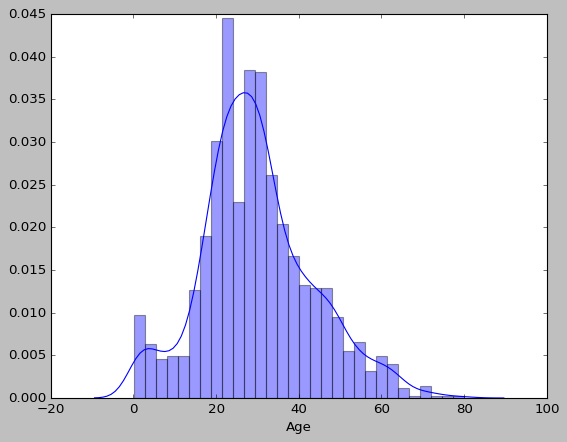

In [32]:
# your code here
sns.distplot(titanic['Age'])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

([<matplotlib.patches.Wedge at 0x7fa10b8ae358>,
 [Text(-0.9893411491555962, 0.48083686483825727, 'Female'),
  Text(0.9893411041363958, -0.48083695746705823, 'Male')],
 [Text(-0.5396406268121433, 0.26227465354814034, '35.6%'),
  Text(0.5396406022562158, -0.26227470407294085, '64.4%')])

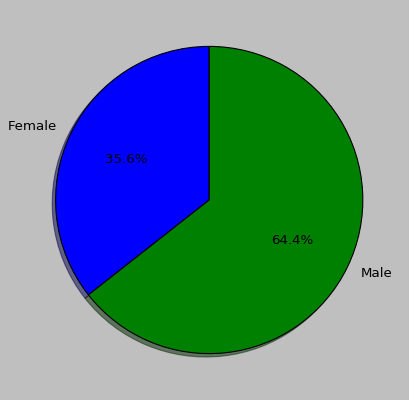

In [65]:
# Method 1 - matplotlib
# your code here
gend = titanic.groupby("Gender").agg({"PassengerId":"count"})
gend= gend.reset_index()
gend = list(gend["PassengerId"])

plt.pie(gend, labels=["Female","Male"] ,autopct = '%1.1f%%', shadow=True, startangle=90)

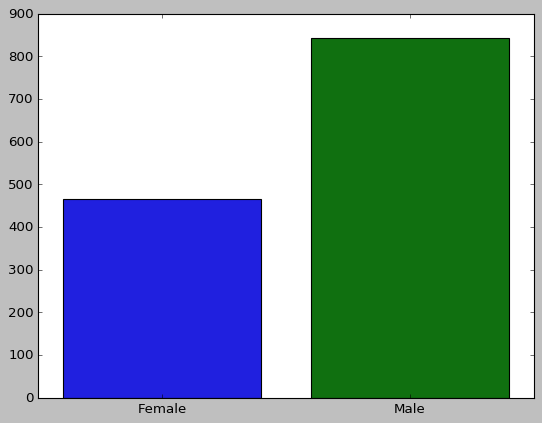

In [57]:
# Method 2 - seaborn
# your code here
sns.barplot(x=["Female","Male"],y=gend)

#### Use the right plot to visualize the column `Pclass`.

([<matplotlib.patches.Wedge at 0x7fa10b7c5d68>,
 [Text(-0.7698434129518064, 0.7857105825523254, 'First'),
  Text(-0.8794073890389915, -0.6607894097998425, 'Second'),
  Text(1.0906037034666365, -0.1434697249765856, 'Third')],
 [Text(-0.4199145888828035, 0.4285694086649047, '24.7%'),
  Text(-0.4796767576576316, -0.36043058716355036, '21.2%'),
  Text(0.594874747345438, -0.07825621362359214, '54.2%')])

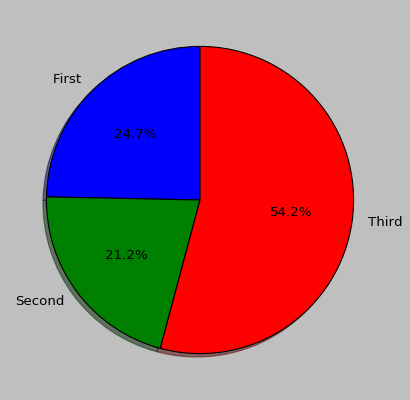

In [66]:
# your code here
pclass = titanic.groupby("Pclass").agg({"PassengerId":"count"})
pclass = pclass.reset_index()
pclass = list(pclass["PassengerId"])

plt.pie(pclass, labels=["First","Second","Third"] ,autopct = '%1.1f%%', shadow=True, startangle=90)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

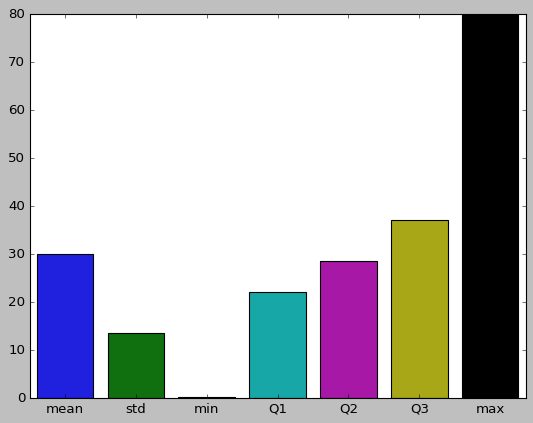

In [96]:
# your code here
summary_age = titanic["Age"].describe()
stats = ["count","mean","std","min","Q1","Q2","Q3","max"]
values = list(summary_age)

plot = sns.barplot(x=stats[1:],y=values[1:])

In [ ]:
"""
The average age is around 30, with a standard deviation of 12.75% of the people were below 40
years old. The oldest were 80 and the youngest were babies below 3.

"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
Most of the passenger of the titanic were people in their working age at the time including
probably a good number of families with babies.
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

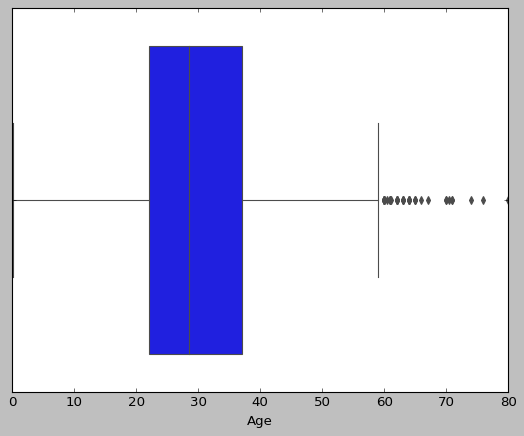

In [98]:
# your code here
sns.boxplot(titanic['Age'])

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
It confirms and expands the assumptions made above. Almost the totality of the
passengers were below 60 years old, with 75% of them below 40 and 25% of them below 20. 
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

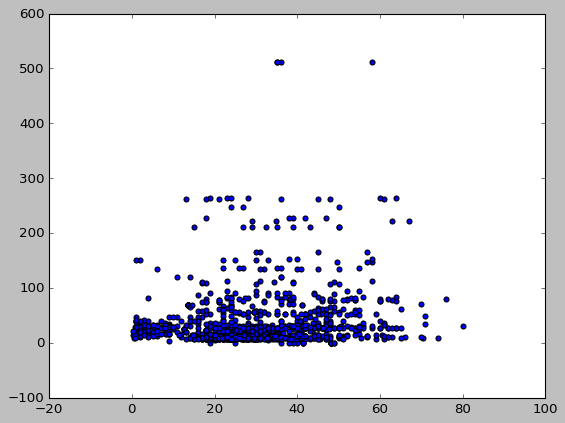

In [104]:
# Method 1 - matplotlib
# your code here
plt.scatter(x="Age", y="Fare", data = titanic)
plt.show()

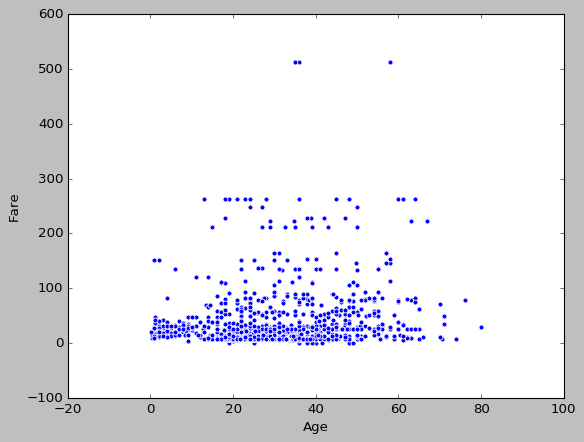

In [103]:
# Method 2 - seaborn
# your code here
sns.scatterplot(x=titanic["Age"],y=titanic["Fare"])

#### Plot the correlation matrix using seaborn.

/home/mattia/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mattia/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


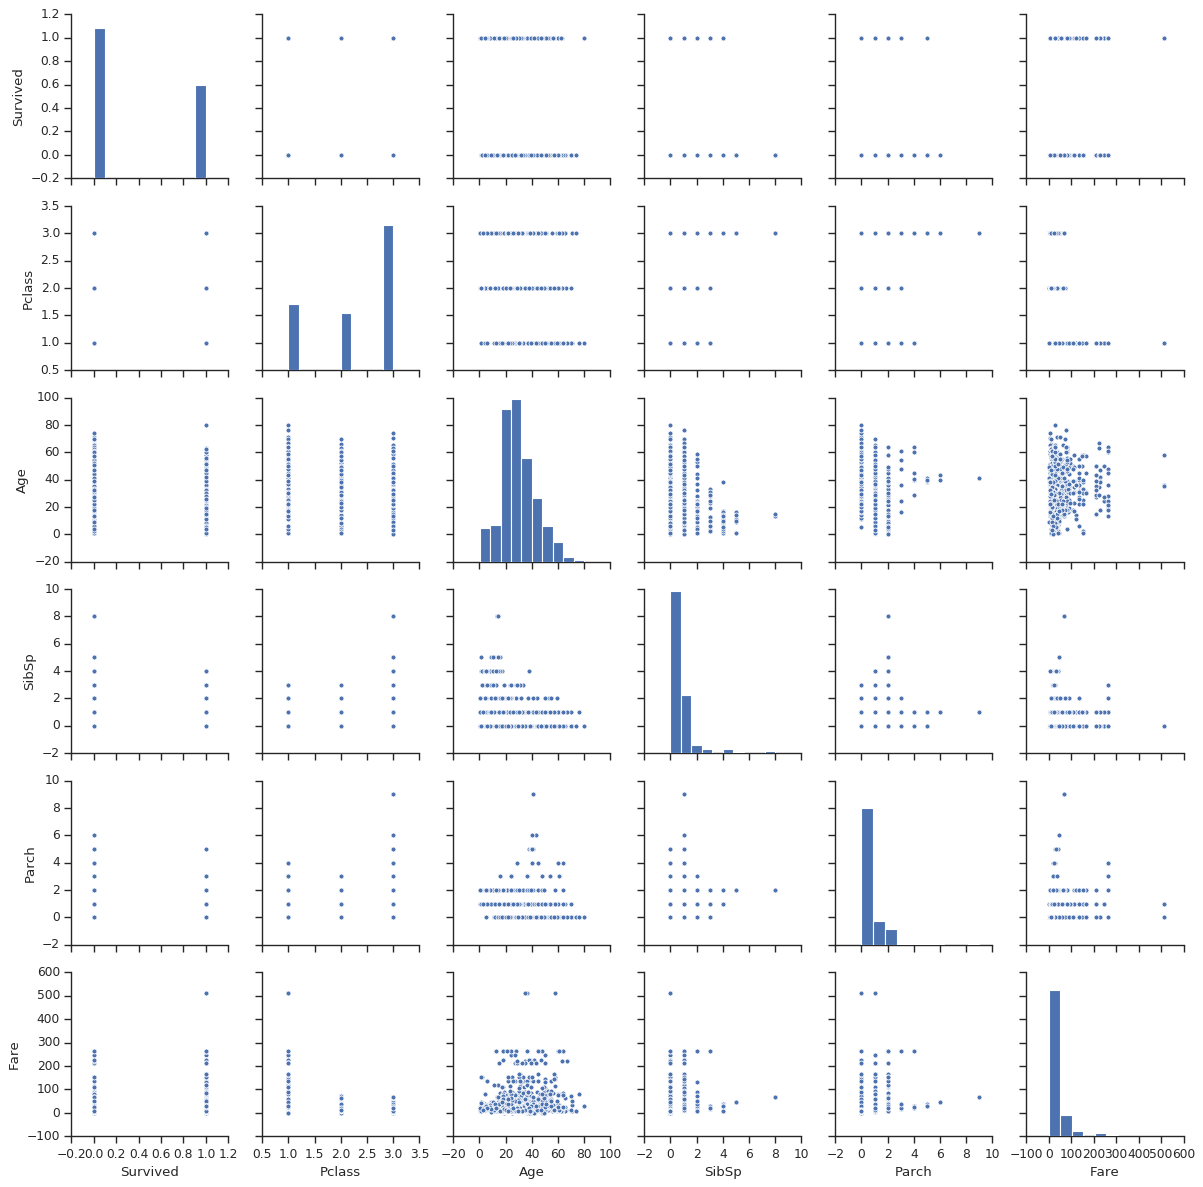

In [105]:
# your code here
sns.set(style="ticks")
sns.pairplot(titanic[["Survived","Pclass","Age","SibSp","Parch","Fare"]])
plt.show()

#### What are the most correlated features?

In [ ]:
"""
Passenger Class and Fare, SibSp and Age.
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

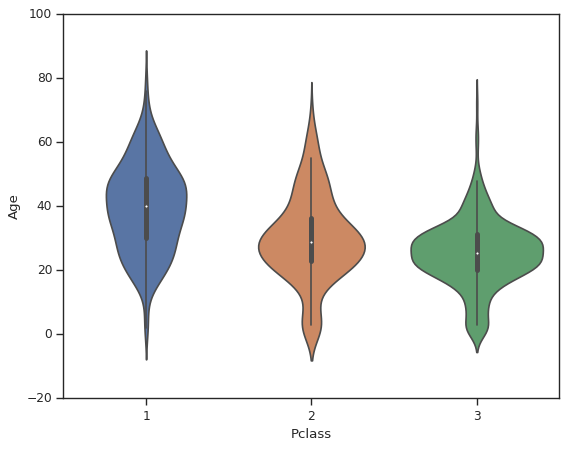

In [106]:
# your code here

sns.violinplot("Pclass","Age", data = titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

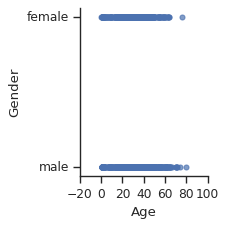

In [117]:
# your code here
g = sns.FacetGrid(titanic)
g.map(plt.scatter, "Age", "Gender", alpha=.7)